## Predictive Maintenance Modeling using NASA's Turbo Fan Dataset

Tanisha Singh, 
Ria Pahujani, 
Swastik Mishra

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Setting up the columns 

In [3]:
temp1 = ['unit_id', 'time_cycle']
temp2 = ['oper_set{}'.format(i) for i in range(1, 4)]
temp3 = ['sm{}'.format(i) for i in range(1, 22)]
col = temp1 + temp2 + temp3
col

['unit_id',
 'time_cycle',
 'oper_set1',
 'oper_set2',
 'oper_set3',
 'sm1',
 'sm2',
 'sm3',
 'sm4',
 'sm5',
 'sm6',
 'sm7',
 'sm8',
 'sm9',
 'sm10',
 'sm11',
 'sm12',
 'sm13',
 'sm14',
 'sm15',
 'sm16',
 'sm17',
 'sm18',
 'sm19',
 'sm20',
 'sm21']

### Importing the Dataset

In [4]:
df = pd.read_csv("C:\\Users\\asus\\Desktop\\AceStat\\train_FD003.txt", delim_whitespace = True, names = col)
df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,519.66,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,519.91,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,519.44,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,520.01,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753


### Prelimnary Data Analysis

In [5]:
df.dtypes

unit_id         int64
time_cycle      int64
oper_set1     float64
oper_set2     float64
oper_set3     float64
sm1           float64
sm2           float64
sm3           float64
sm4           float64
sm5           float64
sm6           float64
sm7           float64
sm8           float64
sm9           float64
sm10          float64
sm11          float64
sm12          float64
sm13          float64
sm14          float64
sm15          float64
sm16          float64
sm17            int64
sm18            int64
sm19          float64
sm20          float64
sm21          float64
dtype: object

In [6]:
df.isna().sum()

unit_id       0
time_cycle    0
oper_set1     0
oper_set2     0
oper_set3     0
sm1           0
sm2           0
sm3           0
sm4           0
sm5           0
sm6           0
sm7           0
sm8           0
sm9           0
sm10          0
sm11          0
sm12          0
sm13          0
sm14          0
sm15          0
sm16          0
sm17          0
sm18          0
sm19          0
sm20          0
sm21          0
dtype: int64

### RUL Calculation

In [7]:
max = df.groupby('unit_id')['time_cycle'].max()
max

unit_id
1      259
2      253
3      222
4      272
5      213
      ... 
96     491
97     275
98     307
99     145
100    152
Name: time_cycle, Length: 100, dtype: int64

In [8]:
rul = pd.DataFrame(max).reset_index()
rul.columns = ['unit_id', 'max']
rul

,unit_id,max
0,1,259
1,2,253
2,3,222
3,4,272
4,5,213
...,...,...
95,96,491
96,97,275
97,98,307
98,99,145


In [9]:
df = df.merge(rul, on = 'unit_id', how = 'left')
df.head()

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm1,sm2,sm3,sm4,sm5,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,max
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,259
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,259
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,259
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,259
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,259


In [10]:
df['RUL'] = df['max'] - df['time_cycle']

In [11]:
df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm1,sm2,sm3,sm4,sm5,...,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,max,RUL
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,152,4
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,152,3
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,152,2
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,152,1


In [12]:
df.drop('max', axis = 1, inplace = True)

### Exploratory Data Analysis

In [13]:
df.describe()

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm1,sm2,sm3,sm4,sm5,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,RUL
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0,24720.00,24720.000000,24720.000000,24720.000000,2.472000e+04,...,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000,24720.000000
mean,48.631877,139.077063,-0.000024,0.000005,100.0,518.67,642.457858,1588.079175,1404.471212,1.462000e+01,...,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024,138.077063
std,29.348985,98.846675,0.002194,0.000294,0.0,0.00,0.523031,6.810418,9.773178,3.552786e-15,...,0.158121,16.504118,0.060512,1.734759e-17,1.761459,0.0,0.0,0.248865,0.149234,98.846675
min,1.000000,1.000000,-0.008600,-0.000600,100.0,518.67,640.840000,1564.300000,1377.060000,1.462000e+01,...,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600,0.000000
25%,23.000000,62.000000,-0.001500,-0.000200,100.0,518.67,642.080000,1583.280000,1397.187500,1.462000e+01,...,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200,61.000000
50%,47.000000,124.000000,-0.000000,-0.000000,100.0,518.67,642.400000,1587.520000,1402.910000,1.462000e+01,...,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600,123.000000
75%,74.000000,191.000000,0.001500,0.000300,100.0,518.67,642.790000,1592.412500,1410.600000,1.462000e+01,...,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300,190.000000
max,100.000000,525.000000,0.008600,0.000700,100.0,518.67,645.110000,1615.390000,1441.160000,1.462000e+01,...,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500,524.000000


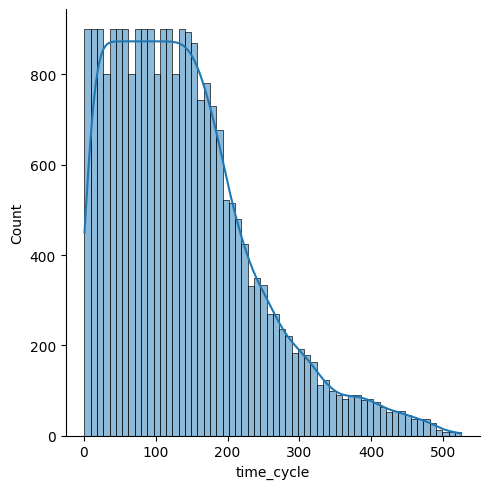

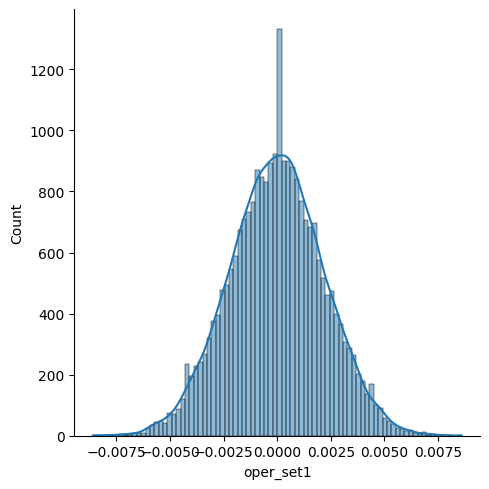

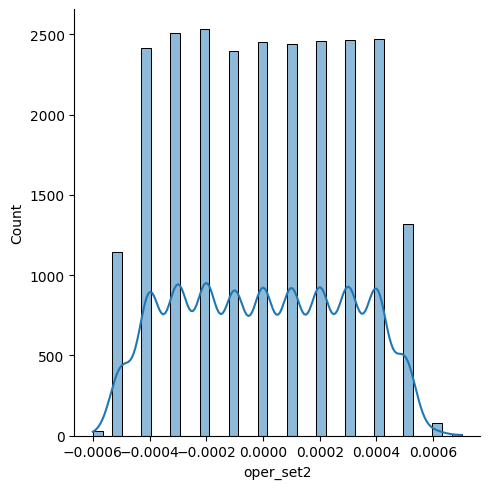

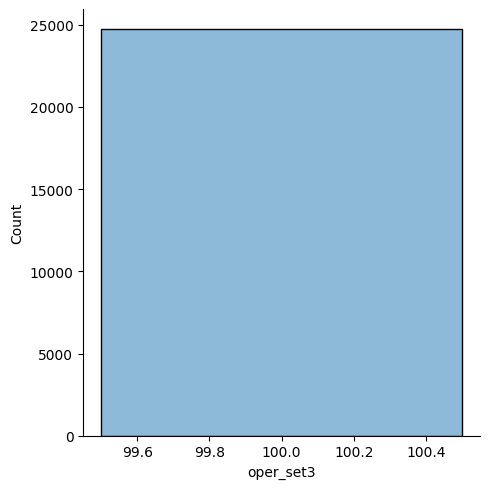

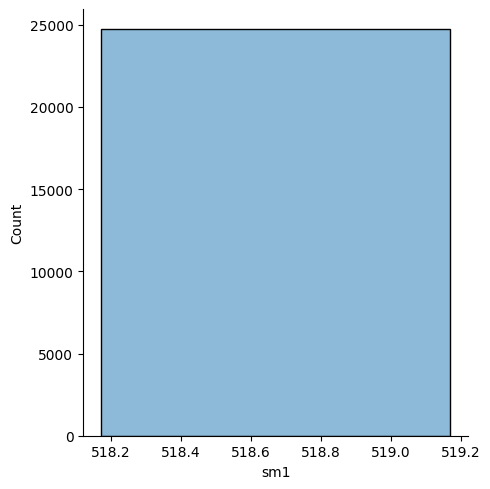

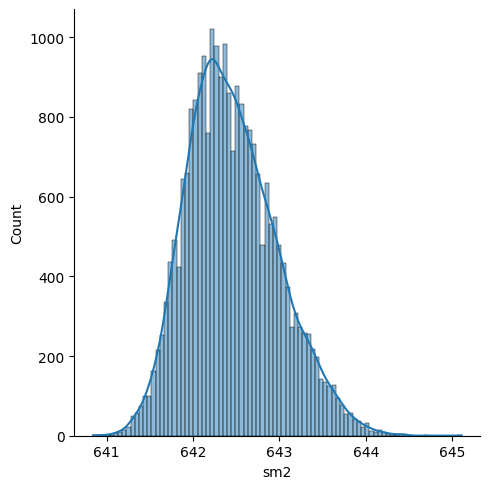

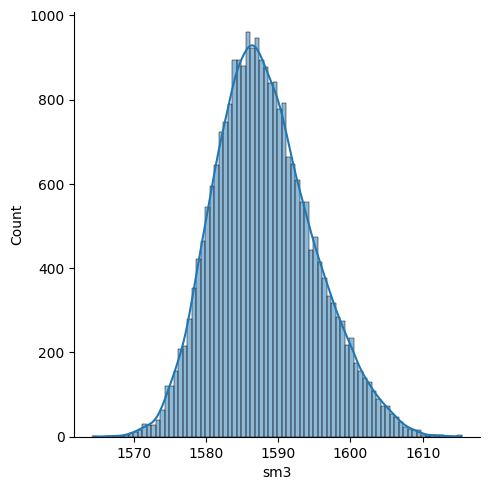

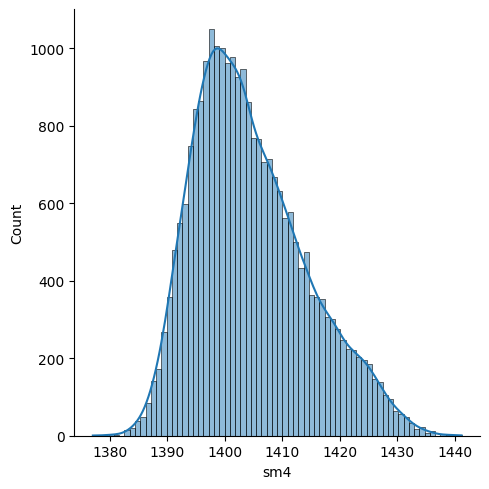

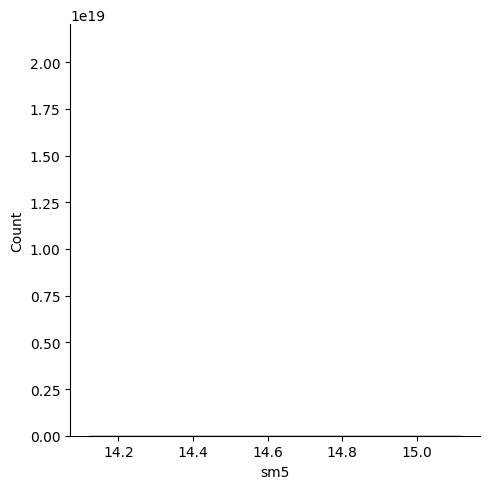

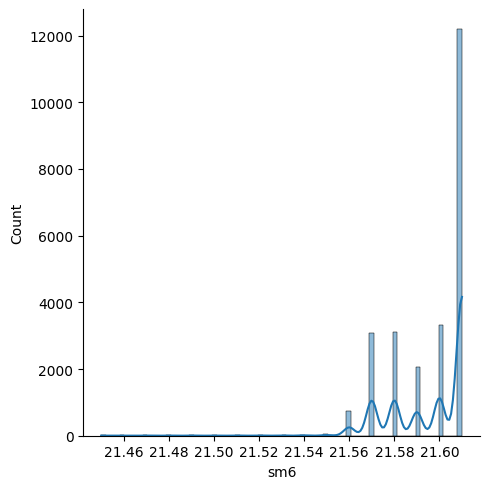

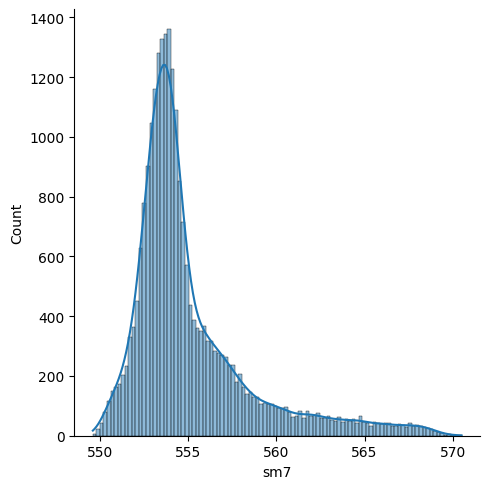

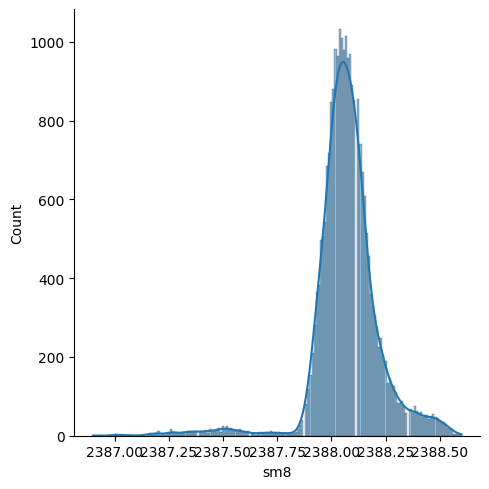

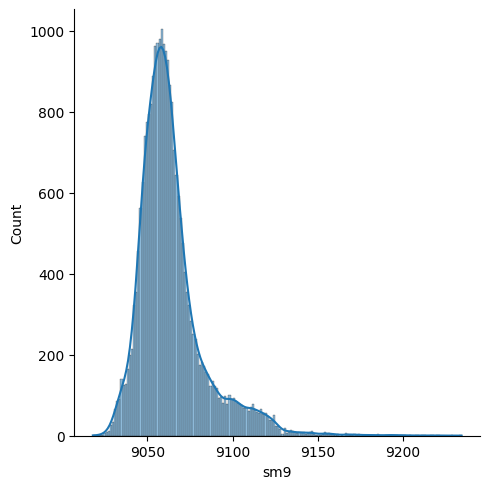

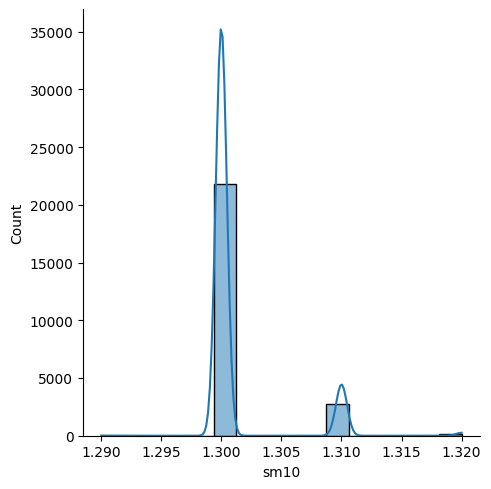

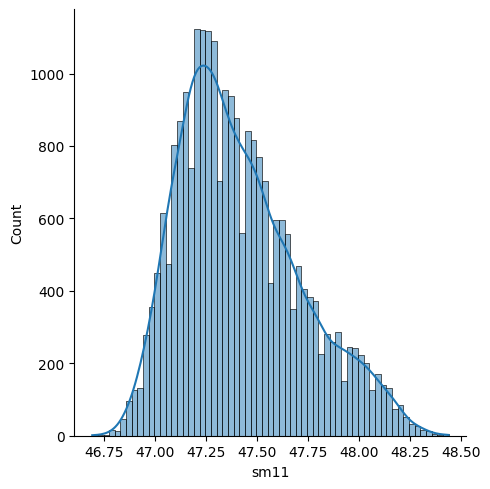

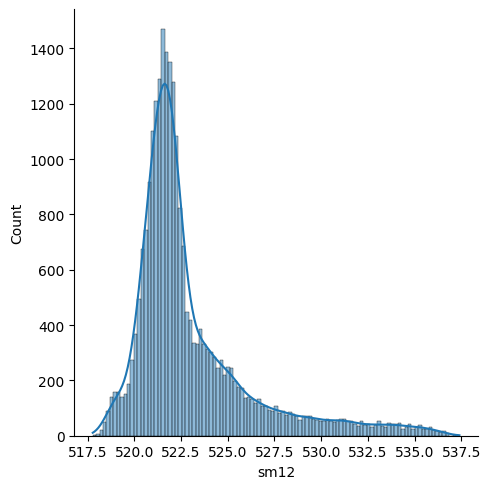

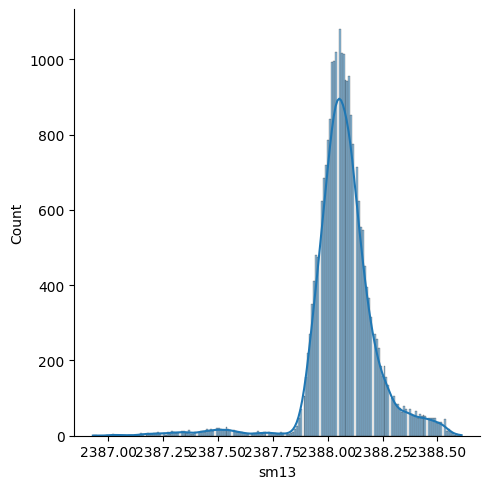

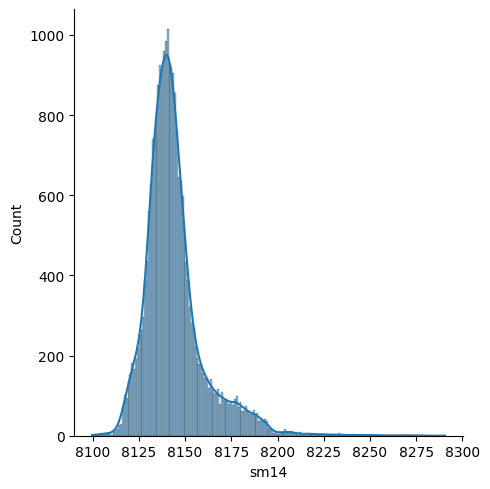

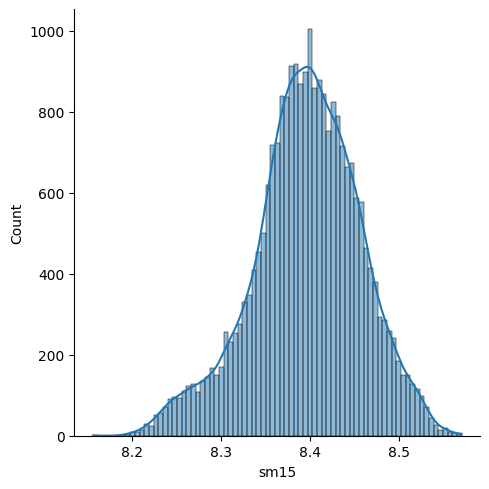

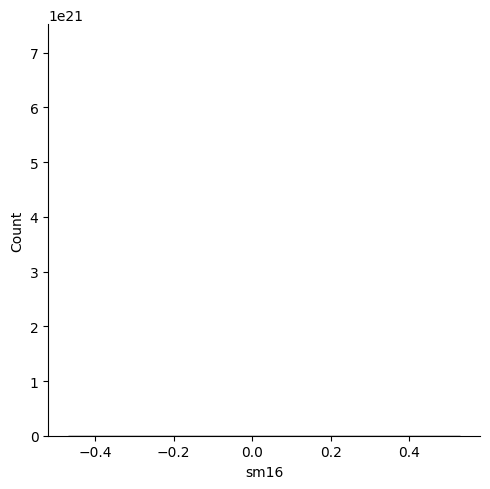

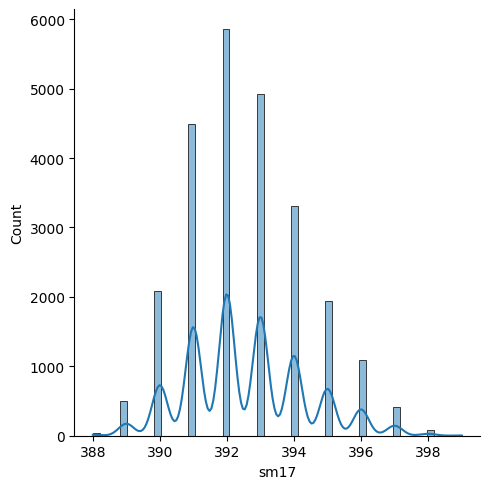

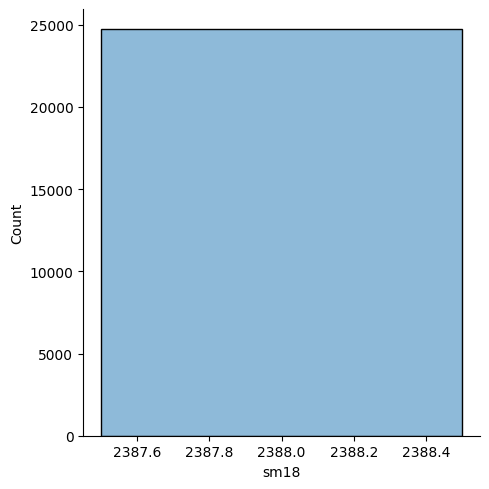

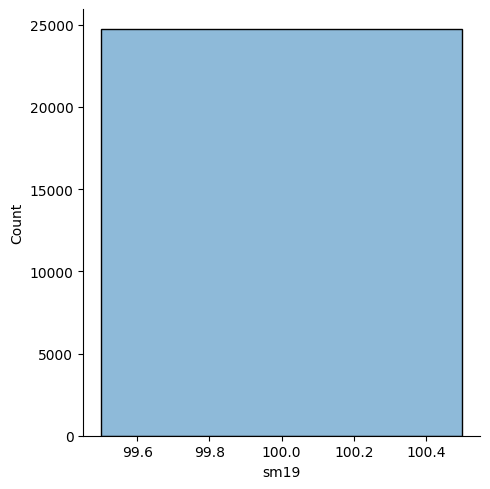

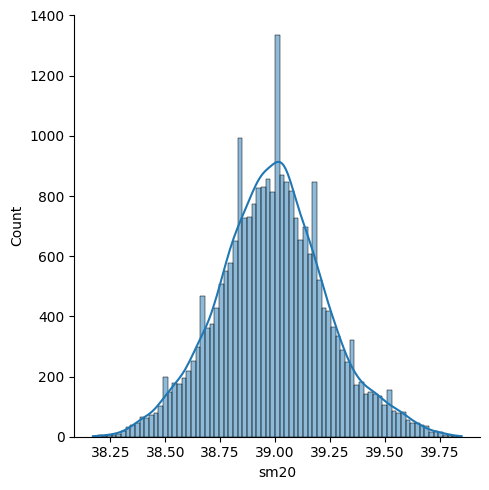

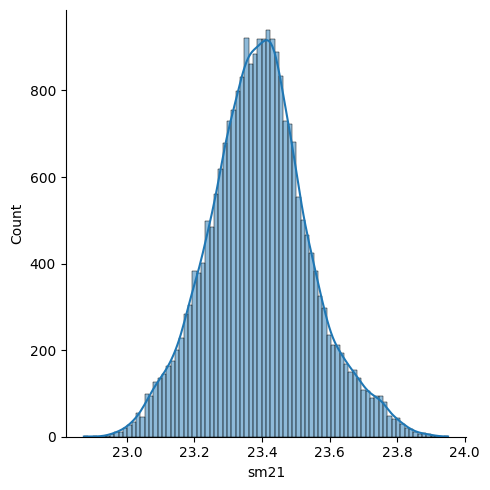

In [14]:
for x in df.iloc[:, 1 : -1]:
    sns.displot(df[x], kde = True)
    plt.show()

<AxesSubplot:>

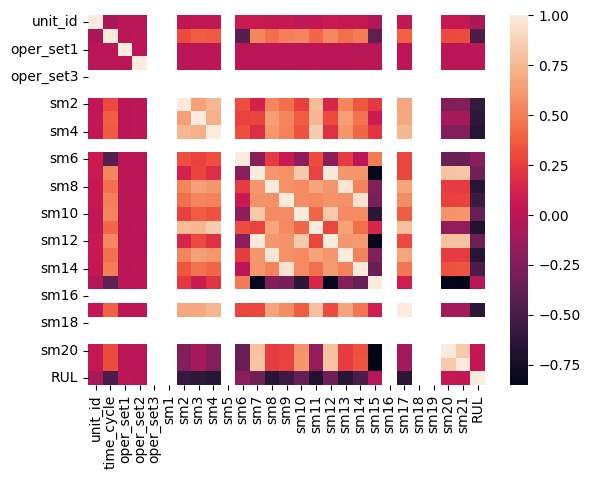

In [15]:
sns.heatmap(df.corr())

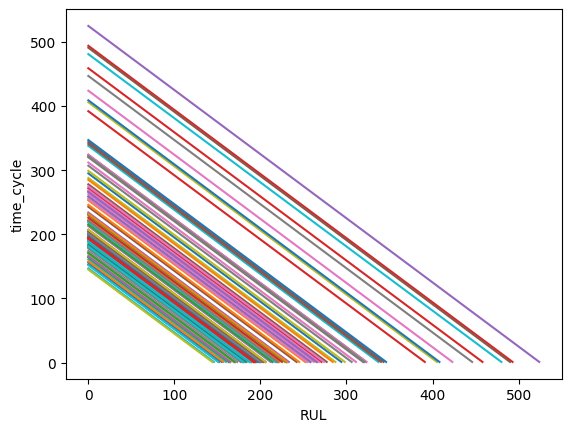

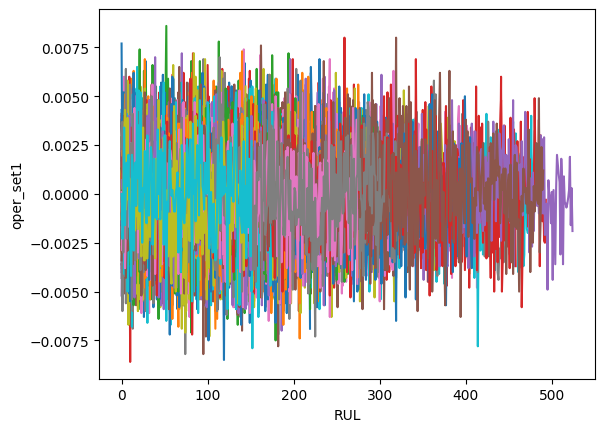

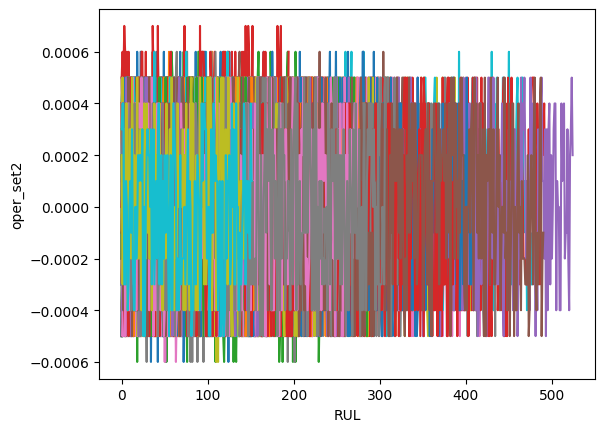

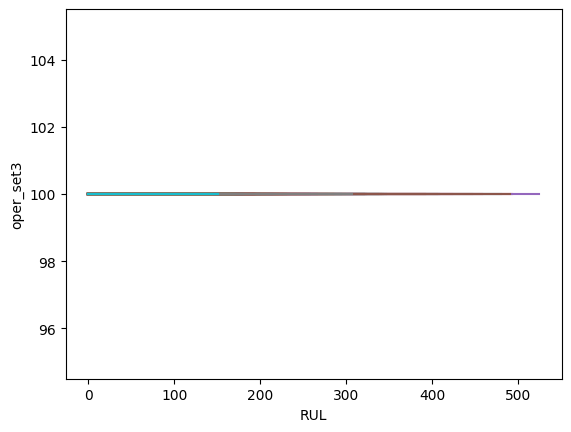

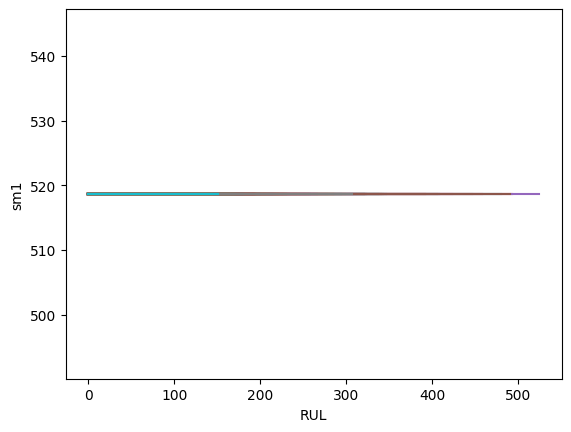

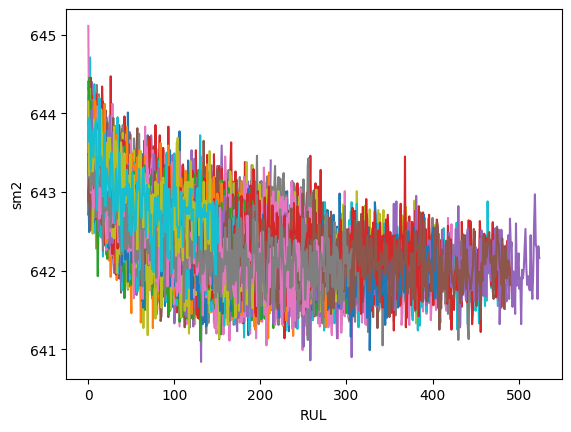

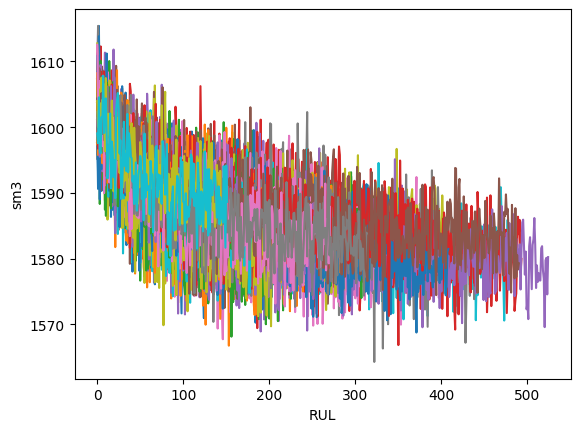

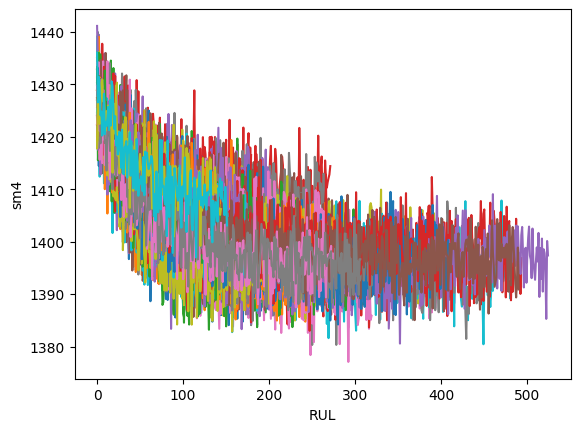

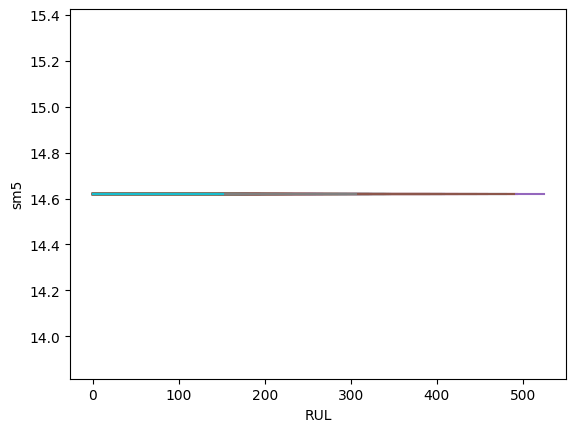

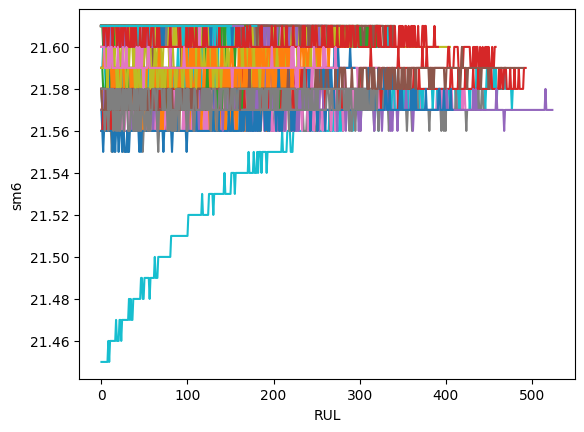

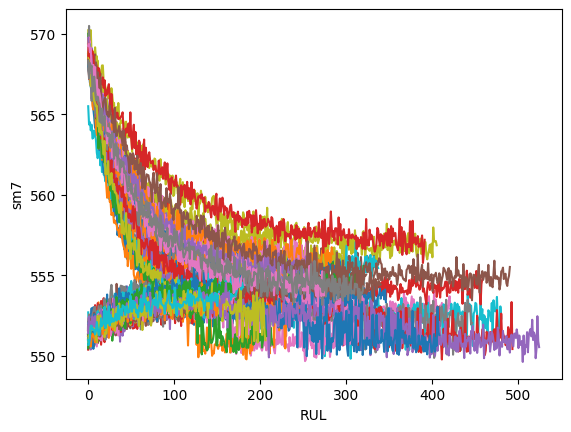

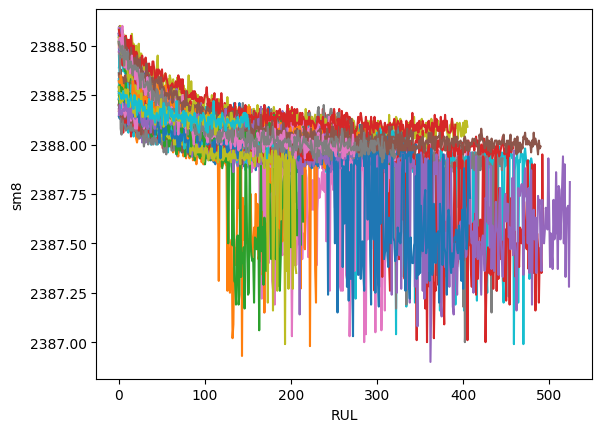

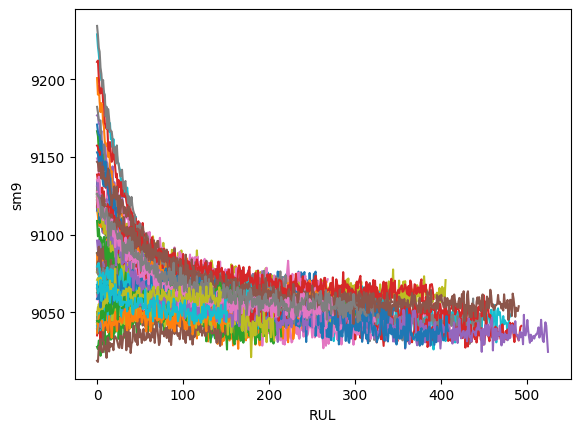

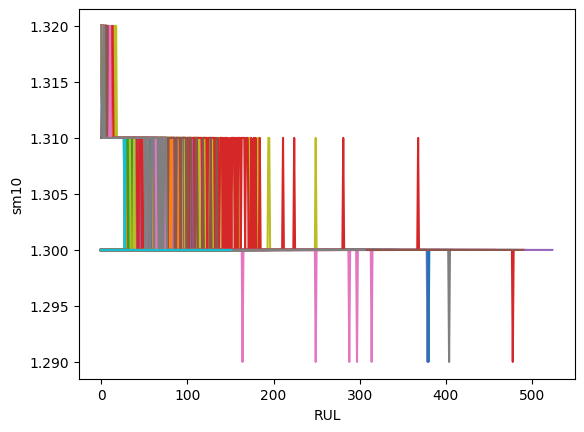

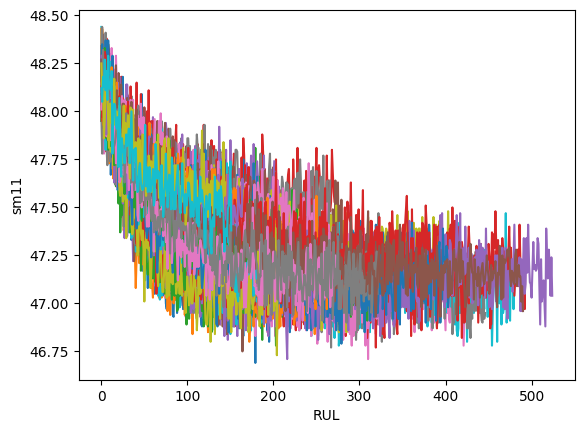

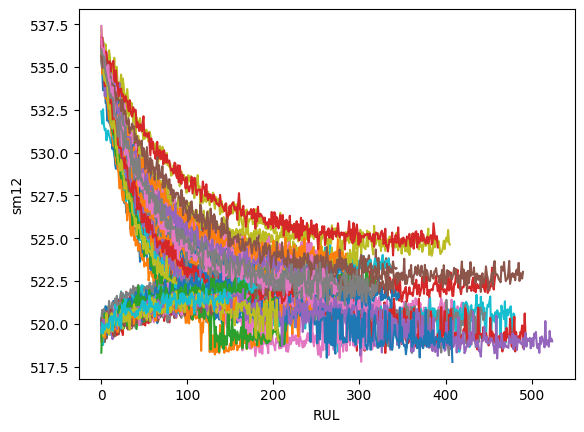

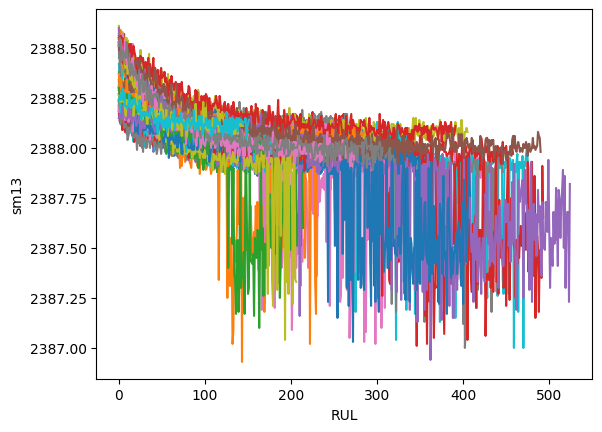

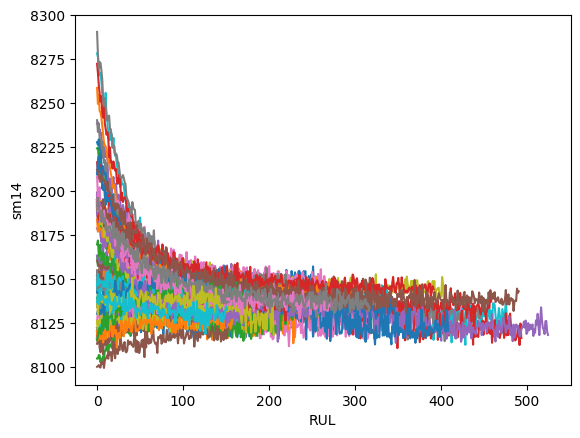

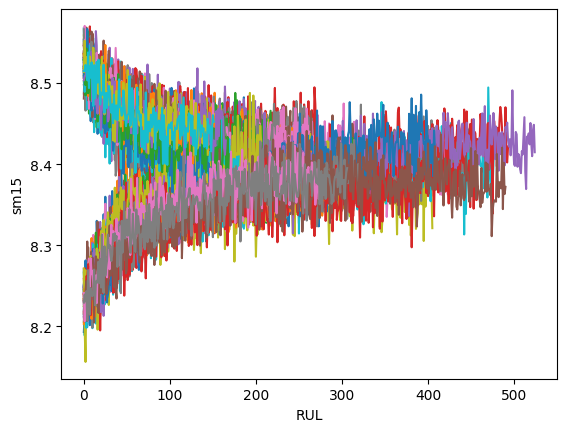

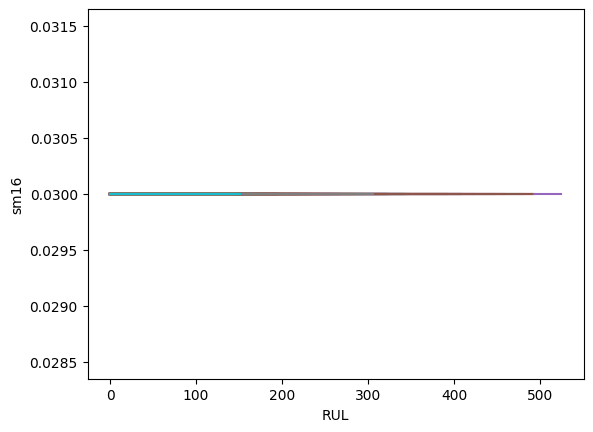

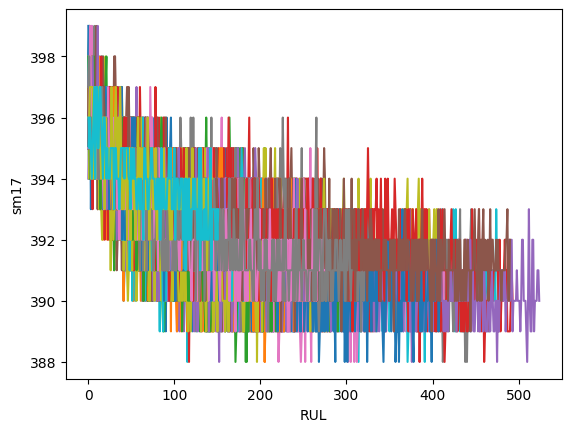

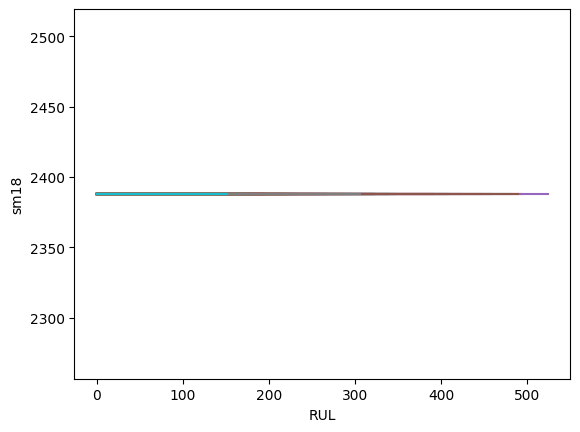

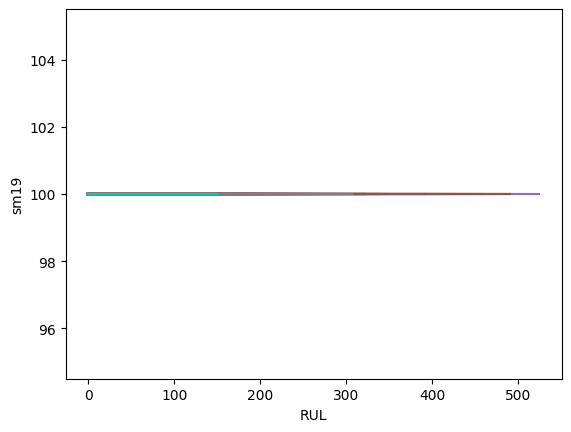

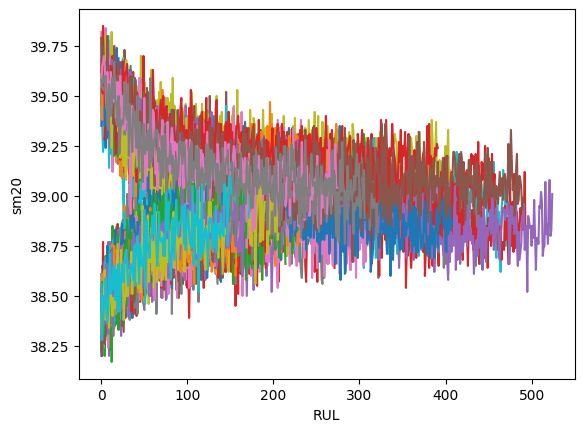

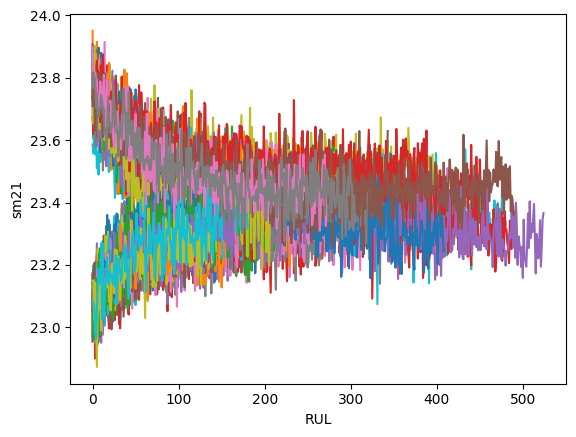

In [16]:
for x in df.iloc[:, 1 : -1]:
    for i in df['unit_id'].unique():
        plt.plot('RUL', x, data = df[df['unit_id']==i])
    plt.xlabel('RUL')
    plt.ylabel(x)
    plt.show()

In [17]:
#for v in df.iloc[:,2 : -1].columns:
#    sns.boxplot(df[v])
#    plt.title(v)
#    plt.show()

# I think no point in outlier analysis (I also checked), as we can see values go awry towards end of life or generally xD
# And no extremes generally
# Also noise reduction would be good data analytics or bad we would have to look.

### Identifying Conditional Identifiers
Removing columns not helpful to us

In [18]:
u = ['oper_set3', 'sm1', 'sm5', 'sm6', 'sm7', 'sm12', 'sm10', 'sm15', 'sm16', 'sm18', 'sm19', 'sm20', 'sm21']
train_df = df.drop(u, axis = 1)
train_df

,unit_id,time_cycle,oper_set1,oper_set2,sm2,sm3,sm4,sm8,sm9,sm11,sm13,sm14,sm17,RUL
0,1,1,-0.0005,0.0004,642.36,1583.23,1396.84,2387.96,9062.17,47.30,2388.01,8145.32,391,258
1,1,2,0.0008,-0.0003,642.50,1584.69,1396.89,2388.00,9061.78,47.23,2388.03,8152.85,392,257
2,1,3,-0.0014,-0.0002,642.18,1582.35,1405.61,2388.03,9070.23,47.22,2388.00,8150.17,391,256
3,1,4,-0.0020,0.0001,642.92,1585.61,1392.27,2388.00,9064.57,47.24,2388.08,8146.56,392,255
4,1,5,0.0016,0.0000,641.68,1588.63,1397.65,2388.04,9076.14,47.15,2388.03,8147.80,392,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,643.78,1596.01,1424.11,2388.25,9070.82,48.27,2388.30,8138.08,394,4
24716,100,149,0.0034,-0.0003,643.29,1596.38,1429.14,2388.23,9064.60,48.13,2388.28,8144.36,395,3
24717,100,150,-0.0016,0.0004,643.84,1604.53,1431.41,2388.25,9063.45,48.18,2388.24,8135.95,396,2
24718,100,151,-0.0023,0.0004,643.94,1597.56,1426.57,2388.26,9062.22,48.05,2388.26,8141.24,395,1


In [1]:
sns.heatmap(train_df.corr(), annot = True)

NameError: name 'sns' is not defined

### ML Time

In [20]:
y = train_df['RUL'].values
X = train_df.drop(['unit_id', 'RUL'], axis = 1).values

### Taking out Train Sets and Test Sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Normalizing the Train and Test Set

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
r2list = {}

In [25]:
from sklearn.metrics import r2_score

r2list['LinearRegression'] = r2_score(y_test, model.predict(X_test))
r2_score(y_test, model.predict(X_test))

0.6042065926619654

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor(max_depth = 5, n_estimators = 250, random_state = 42)
model1.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250, random_state=42)

In [27]:
r2list['GradientBoostingRegressor'] = r2_score(y_test, model1.predict(X_test))
r2_score(y_test, model1.predict(X_test))

0.6871264049940352

In [28]:
from sklearn.linear_model import Ridge

model2 = Ridge()
model2.fit(X_train, y_train)

Ridge()

In [29]:
x = r2_score(y_test, model2.predict(X_test))
r2list['Ridge'] = x
x

0.6042772675688228

In [30]:
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
x = r2_score(y_test, model3.predict(X_test))
r2list['DecisionTreeRegressor'] = x
x

0.3644481702452207

In [32]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor()
model4.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
x = r2_score(y_test, model4.predict(X_test))
r2list['RandomForestRegressor'] = x
x

0.6918797405131547

In [35]:
from xgboost import XGBRegressor

model5 = XGBRegressor()
model5.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
x = r2_score(y_test, model5.predict(X_test))
r2list['XGBRegressor'] = x
x

0.668116202631615

### Model Evaluation ~(˘▾˘~)

In [37]:
r2list

{'LinearRegression': 0.6042065926619654,
 'GradientBoostingRegressor': 0.6871264049940352,
 'Ridge': 0.6042772675688228,
 'DecisionTreeRegressor': 0.3644481702452207,
 'RandomForestRegressor': 0.6918797405131547,
 'XGBRegressor': 0.668116202631615}

### Pickling Model for Front End
We'll use GradientBoosterRegressor

In [40]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(model1, files)
with open('scaler.pkl', 'wb') as files:
    pickle.dump(scaler, files)